In [31]:
%pip install pandas numpy matplotlib seaborn
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np # operaciones matematicas
import pandas as pd # manipular datos
import matplotlib.pyplot as plt # graficas
import seaborn as sns # graficas
sns.set_theme(style="darkgrid")
%matplotlib inline

# Data display customization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\adtda\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [32]:
#### Funciones auxiliares ######
def porcentaje_nulos(dataframe):
    # Calcula el porcentaje de valores nulos en cada columna
    porcentaje_nas = (dataframe.isnull().mean() * 100).round(2)

    # Convierte la información a un diccionario
    dict_nulos = porcentaje_nas.to_dict()

    return dict_nulos

def eliminar_columnas_con_nulos(df, umbral=0.15):

    # Calcula el porcentaje de valores nulos por columna
    porcentaje_nulos = df.isnull().mean()

    # Filtra las columnas que tienen menos del umbral de valores nulos
    columnas_a_mantener = porcentaje_nulos[porcentaje_nulos <= (1 - umbral)].index

    # Crea un nuevo DataFrame con las columnas seleccionadas
    df_resultante = df[columnas_a_mantener].copy()

    return df_resultante

In [33]:
customer_df = pd.read_csv('archive/customer.csv')
customer_df.shape

(10695, 10)

In [34]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 835.7+ KB


In [35]:
customer_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [36]:
customer_df.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [37]:
customer_df.describe(include='object')

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
count,10695,10505,10593,10533,10695,10587
unique,2,2,2,9,3,7
top,Male,Yes,Yes,Artist,Low,Cat_6
freq,5841,6163,6570,3318,6494,6910


In [38]:
customer_df.corr(numeric_only=True)

,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.009562,-0.029351,0.014095
Age,-0.009562,1.000000,-0.189653,-0.281725
Work_Experience,-0.029351,-0.189653,1.000000,-0.065163
Family_Size,0.014095,-0.281725,-0.065163,1.000000


In [39]:
%pip install jinja2
customer_df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\adtda\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.009562,-0.029351,0.014095
Age,-0.009562,1.000000,-0.189653,-0.281725
Work_Experience,-0.029351,-0.189653,1.000000,-0.065163
Family_Size,0.014095,-0.281725,-0.065163,1.000000


In [40]:
porcentaje_nulos(customer_df)

{'ID': 0.0,
 'Gender': 0.0,
 'Ever_Married': 1.78,
 'Age': 0.0,
 'Graduated': 0.95,
 'Profession': 1.51,
 'Work_Experience': 10.27,
 'Spending_Score': 0.0,
 'Family_Size': 4.19,
 'Var_1': 1.01}

In [41]:
customer_df.loc[customer_df.duplicated()]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
2659,462454,Male,No,19,No,Healthcare,1.0,Low,3.0,Cat_2
2666,467442,Male,Yes,56,Yes,Artist,NaN,Average,2.0,Cat_6
2712,461671,Male,No,32,No,Healthcare,7.0,Low,5.0,Cat_6
2758,466746,Female,Yes,69,Yes,Lawyer,0.0,High,2.0,Cat_6
2820,467539,Male,Yes,48,Yes,Artist,NaN,Average,4.0,Cat_7
...,...,...,...,...,...,...,...,...,...,...
10492,467569,Male,No,19,No,Healthcare,NaN,Low,4.0,Cat_6
10514,463075,Male,Yes,52,Yes,Artist,0.0,Low,4.0,Cat_6
10645,460935,Male,Yes,87,Yes,Lawyer,0.0,Low,1.0,Cat_6
10650,464274,Female,Yes,56,Yes,Artist,1.0,Average,5.0,Cat_6


In [42]:
customer_df.drop_duplicates(inplace=True)

In [43]:
customer_df.loc[customer_df.duplicated()]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1


In [44]:
customer_df.shape

(10559, 10)

In [45]:
porcentaje_nulos(customer_df)

{'ID': 0.0,
 'Gender': 0.0,
 'Ever_Married': 1.75,
 'Age': 0.0,
 'Graduated': 0.94,
 'Profession': 1.52,
 'Work_Experience': 10.11,
 'Spending_Score': 0.0,
 'Family_Size': 4.19,
 'Var_1': 0.99}

In [46]:
customer_df = customer_df.replace('Select', np.nan)

In [47]:
porcentaje_nulos(customer_df)

{'ID': 0.0,
 'Gender': 0.0,
 'Ever_Married': 1.75,
 'Age': 0.0,
 'Graduated': 0.94,
 'Profession': 1.52,
 'Work_Experience': 10.11,
 'Spending_Score': 0.0,
 'Family_Size': 4.19,
 'Var_1': 0.99}

In [48]:
customer_df['Work_Experience'].value_counts(normalize=True) #Lo dejo ya que esta bien distribuido y pede aportar datos importantes

Work_Experience
1.0     0.325572
0.0     0.320936
8.0     0.063955
9.0     0.063850
2.0     0.039300
4.0     0.036140
3.0     0.034875
5.0     0.028132
6.0     0.027816
7.0     0.026762
14.0    0.006849
11.0    0.006743
10.0    0.006743
12.0    0.006322
13.0    0.006006
Name: proportion, dtype: float64

In [49]:
customer_df['Ever_Married'].value_counts(normalize=True) #Lo dejo ya que esta bien distribuido y pede aportar datos importantes

Ever_Married
Yes    0.587527
No     0.412473
Name: proportion, dtype: float64

In [50]:
customer_df['Graduated'].value_counts(normalize=True) #Lo dejo ya que esta bien distribuido y pede aportar datos importantes

Graduated
Yes    0.62065
No     0.37935
Name: proportion, dtype: float64

In [51]:
customer_df['Profession'].value_counts(normalize=True) #Lo dejo ya que esta bien distribuido y pede aportar datos importantes

Profession
Artist           0.315223
Healthcare       0.165977
Entertainment    0.118665
Engineer         0.088951
Doctor           0.088470
Lawyer           0.080008
Executive        0.074046
Marketing        0.037696
Homemaker        0.030965
Name: proportion, dtype: float64

In [52]:
customer_df['Family_Size'].value_counts(normalize=True) #Lo dejo ya que esta bien distribuido y pede aportar datos importantes

Family_Size
2.0    0.308590
1.0    0.191460
3.0    0.190175
4.0    0.178017
5.0    0.078976
6.0    0.028467
7.0    0.011960
8.0    0.006425
9.0    0.005931
Name: proportion, dtype: float64

In [53]:
customer_df['Graduated'].value_counts(normalize=True)

Graduated
Yes    0.62065
No     0.37935
Name: proportion, dtype: float64

In [54]:
customer_df['Var_1'].value_counts(normalize=True)

Var_1
Cat_6    0.653530
Cat_4    0.138894
Cat_3    0.102544
Cat_2    0.053281
Cat_7    0.025062
Cat_1    0.015783
Cat_5    0.010905
Name: proportion, dtype: float64

In [55]:
# Rellenar los valores nulos en la columna 'Ever_Married' con la moda
customer_df['Ever_Married'].fillna(customer_df['Ever_Married'].mode()[0], inplace=True)
# Rellenar los valores nulos en la columna 'Var_1' con la moda
customer_df['Var_1'].fillna(customer_df['Var_1'].mode()[0], inplace=True)
# Rellenar los valores nulos en la columna 'Work_Experience' con la mediana
customer_df['Work_Experience'].fillna(customer_df['Work_Experience'].median(), inplace=True)
# Rellenar los valores nulos en la columna 'Profession' con la moda
customer_df['Profession'].fillna(customer_df['Profession'].mode()[0], inplace=True)
# Rellenar los valores nulos en la columna 'Graduated' con la moda
customer_df['Graduated'].fillna(customer_df['Graduated'].mode()[0], inplace=True)
# Rellenar los valores nulos en la columna 'Family_Size' con la mediana
customer_df['Family_Size'].fillna(customer_df['Family_Size'].median(), inplace=True)

In [56]:
customer_df = customer_df.replace('Select', np.nan)

In [57]:
porcentaje_nulos(customer_df)

{'ID': 0.0,
 'Gender': 0.0,
 'Ever_Married': 0.0,
 'Age': 0.0,
 'Graduated': 0.0,
 'Profession': 0.0,
 'Work_Experience': 0.0,
 'Spending_Score': 0.0,
 'Family_Size': 0.0,
 'Var_1': 0.0}

In [58]:
customer_df.duplicated().sum()

0

In [59]:
customer_df.nunique()

ID                 8363
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
dtype: int64

Visualizando distribuciones numéricas...


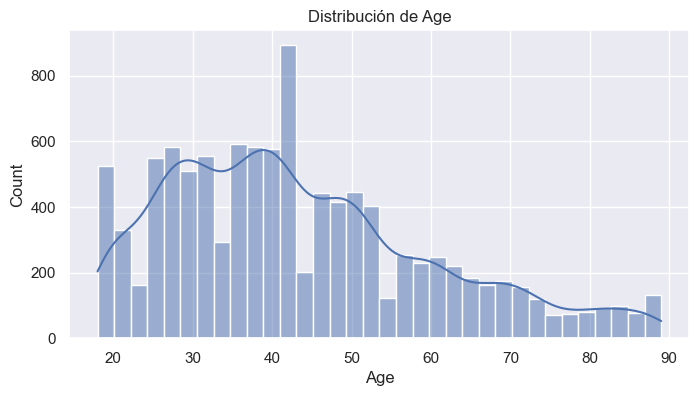

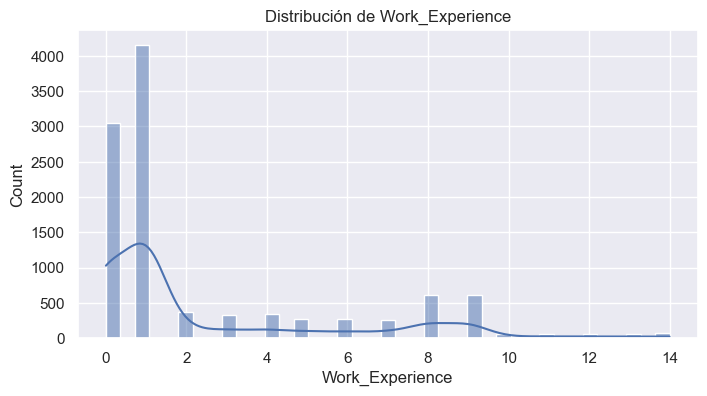

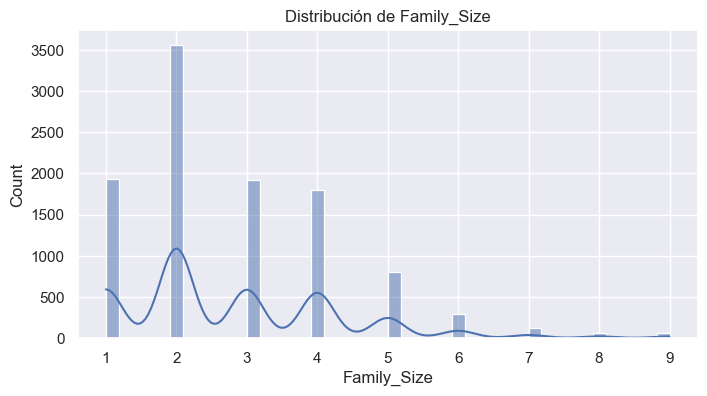

In [60]:
customer_df = customer_df.drop(columns=['ID'], axis=1)
numeric_cols = customer_df.select_dtypes(include=np.number).columns.tolist()
print("Visualizando distribuciones numéricas...")
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(customer_df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()


In [61]:
categorical_cols = customer_df.select_dtypes(include='object').columns.tolist()
# Asegúrate de que Var_1 se trate como categórica si lo es
if 'Var_1' in customer_df.columns and customer_df['Var_1'].dtype != 'object':
     customer_df['Var_1'] = customer_df['Var_1'].astype('category') # O 'object'
     if 'Var_1' not in categorical_cols:
          categorical_cols.append('Var_1')


Visualizando distribuciones categóricas...


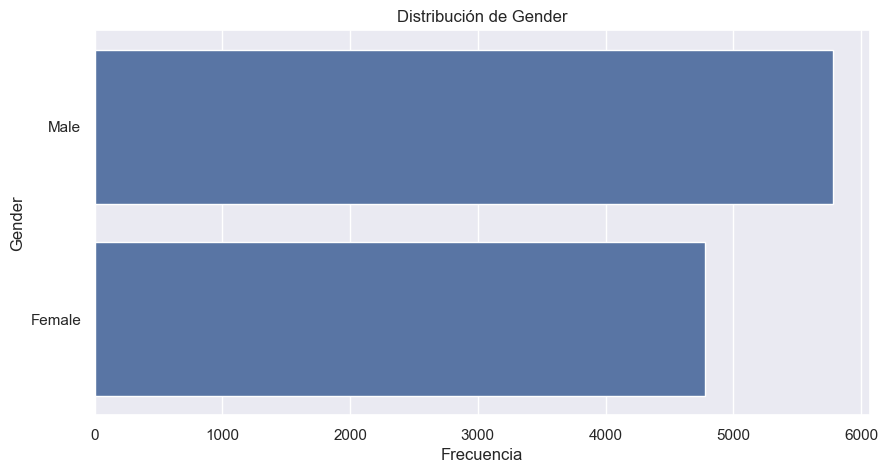

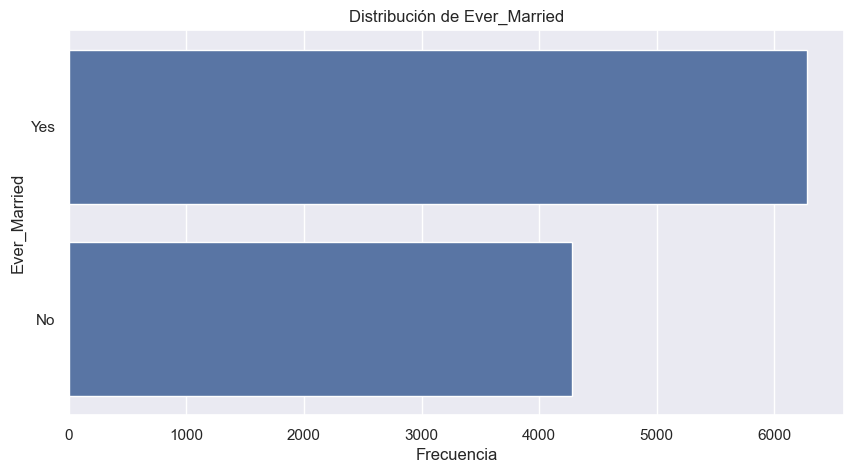

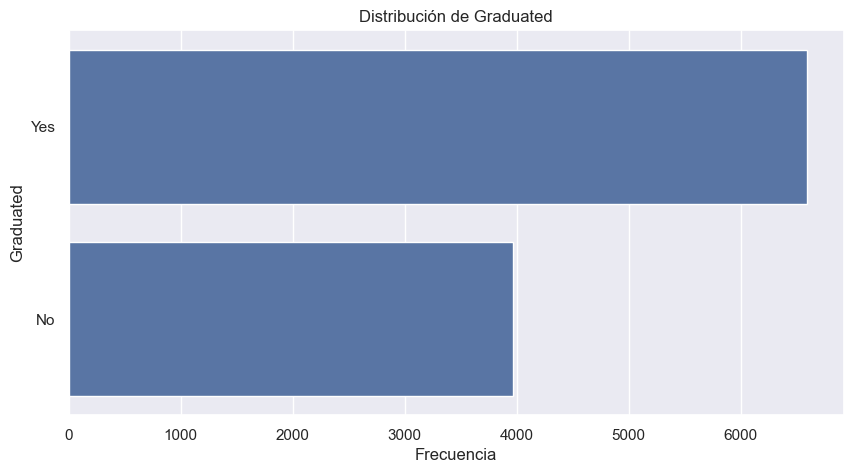

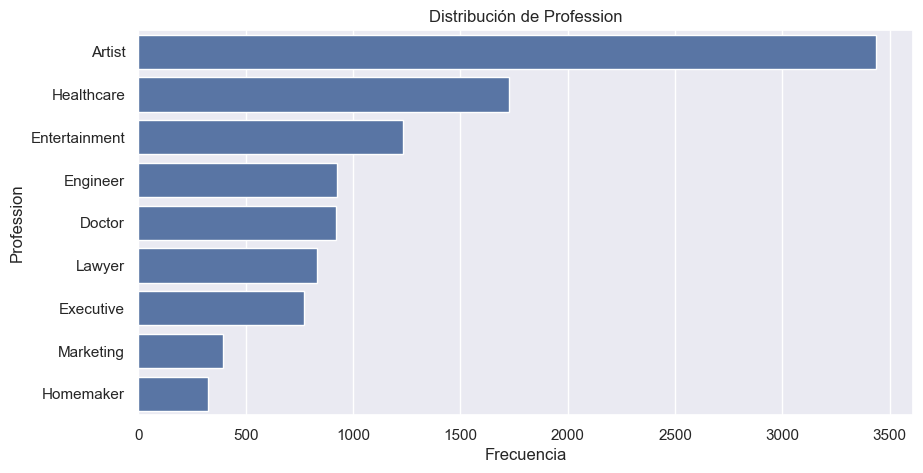

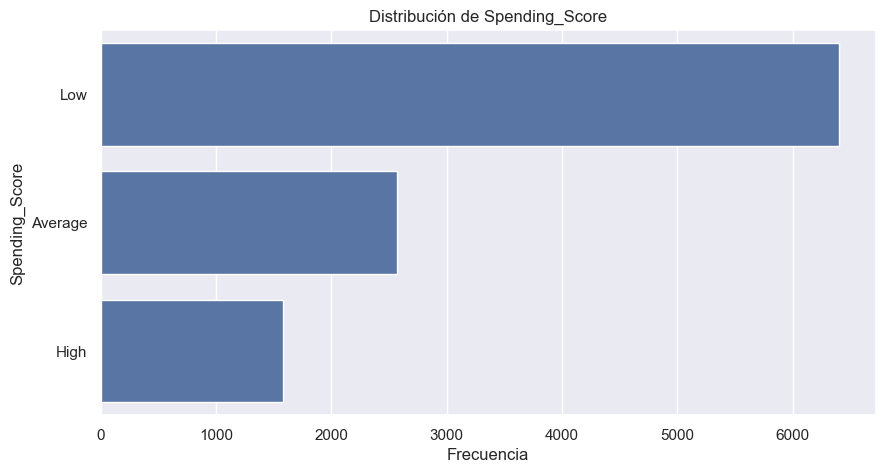

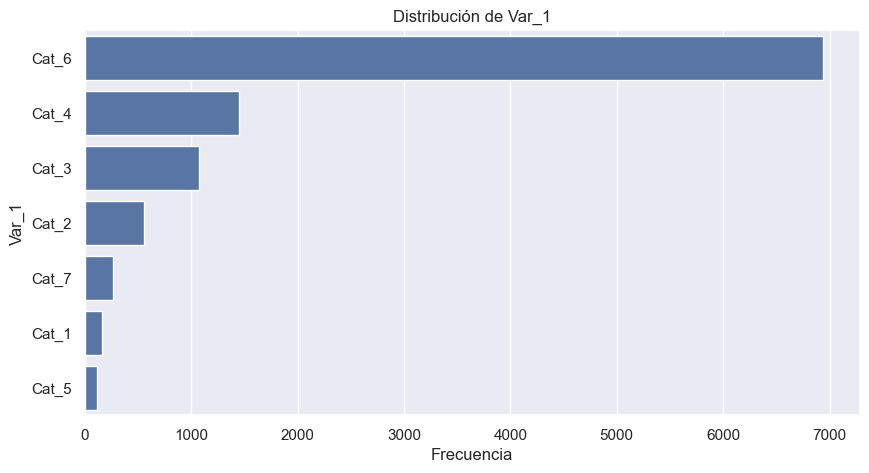

In [62]:
print("\nVisualizando distribuciones categóricas...")
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    # Ordenar por frecuencia puede ser útil
    order = customer_df[col].value_counts().index 
    sns.countplot(data=customer_df, y=col, order=order) # Usar 'y' para mejor legibilidad con muchas categorías
    plt.title(f'Distribución de {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.show()

In [63]:
customer_df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,Female,Yes,69,No,Artist,0.0,Low,1.0,Cat_6
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,Female,No,19,No,Marketing,1.0,Low,4.0,Cat_6


In [64]:
customer_df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

In [65]:
varlist =  ['Gender']

def binary_map(x):
    return x.map({'Male': 1, "Female": 0})

# aplicamos el mapeo
customer_df[varlist] = customer_df[varlist].apply(binary_map)

In [66]:
varlist =  ['Ever_Married', 'Graduated']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# aplicamos el mapeo
customer_df[varlist] = customer_df[varlist].apply(binary_map)

In [67]:
varlist =  ['Spending_Score']

def binary_map(x):
    return x.map({'Low': 0, "Average": 1, "High": 2})

# aplicamos el mapeo
customer_df[varlist] = customer_df[varlist].apply(binary_map)

In [68]:
varlist =  ['Var_1']

def binary_map(x):
    return x.map({'Cat_1': 0, "Cat_2": 1, "Cat_3": 2, "Cat_4": 3, "Cat_5": 4, "Cat_6": 5, "Cat_7": 6})

# aplicamos el mapeo
customer_df[varlist] = customer_df[varlist].apply(binary_map)

In [69]:
customer_df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1,36,1,Engineer,0.0,0,1.0,5
1,1,1,37,1,Healthcare,8.0,1,4.0,5
2,0,1,69,0,Artist,0.0,0,1.0,5
3,1,1,59,0,Executive,11.0,2,2.0,5
4,0,0,19,0,Marketing,1.0,0,4.0,5


In [70]:
customer_df['Profession'].value_counts(normalize=True)

Profession
Artist           0.325599
Healthcare       0.163462
Entertainment    0.116867
Engineer         0.087603
Doctor           0.087129
Lawyer           0.078795
Executive        0.072924
Marketing        0.037125
Homemaker        0.030495
Name: proportion, dtype: float64

In [71]:
varlist =  ['Profession']

def binary_map(x):
    return x.map({'Artist': 0, "Healthcare": 1, "Entertainment": 2, "Engineer": 3, "Doctor": 4, "Lawyer": 5, "Executive": 6, "Marketing": 7, "Homemaker": 8})

# aplicamos el mapeo
customer_df[varlist] = customer_df[varlist].apply(binary_map)

In [72]:
customer_df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1,36,1,3,0.0,0,1.0,5
1,1,1,37,1,1,8.0,1,4.0,5
2,0,1,69,0,0,0.0,0,1.0,5
3,1,1,59,0,6,11.0,2,2.0,5
4,0,0,19,0,7,1.0,0,4.0,5


In [73]:
customer_df.shape

(10559, 9)

In [81]:
from sklearn.model_selection import train_test_split

customer_df = customer_df.dropna()
x = customer_df

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x[['Gender','Ever_Married','Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1' ]] = scaler.fit_transform(x[['Gender','Ever_Married','Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']])
x.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.0,1.0,0.253521,1.0,0.375,0.000000,0.0,0.000,0.833333
1,1.0,1.0,0.267606,1.0,0.125,0.571429,0.5,0.375,0.833333
2,0.0,1.0,0.718310,0.0,0.000,0.000000,0.0,0.000,0.833333
3,1.0,1.0,0.577465,0.0,0.750,0.785714,1.0,0.125,0.833333
4,0.0,0.0,0.014085,0.0,0.875,0.071429,0.0,0.375,0.833333


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans.fit(x) 
y_kmeans = kmeans.predict(x) 
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

In [110]:
y_kmeans

array([1, 0, 1, ..., 2, 2, 0])

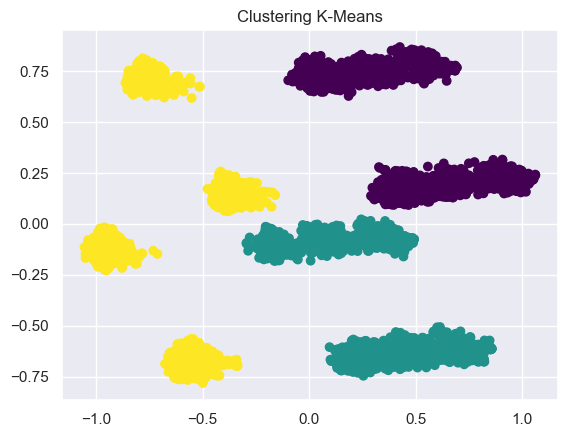

In [ ]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_kmeans, cmap='viridis', marker='o') 
plt.title('Clustering K-Means')
plt.show() 

In [ ]:
from sklearn.cluster import DBSCAN 
dbscan = DBSCAN(eps=0.5, min_samples=3)
y_dbscan = dbscan.fit_predict(x) 
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

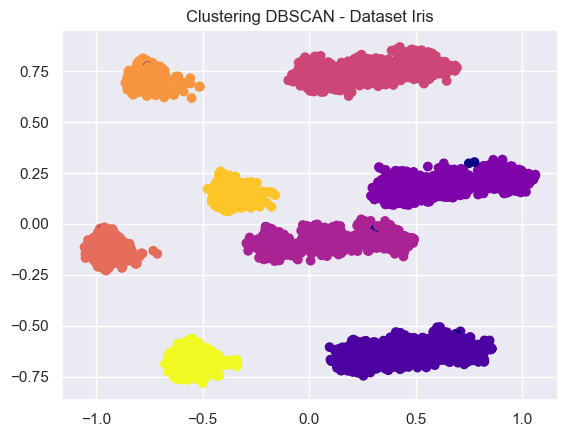

In [131]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_dbscan, cmap='plasma', marker='o') 
plt.title('Clustering DBSCAN - Dataset Iris') 
plt.show() 

In [134]:
from scipy.cluster.hierarchy import dendrogram, linkage 
Z = linkage(x, method='ward') 

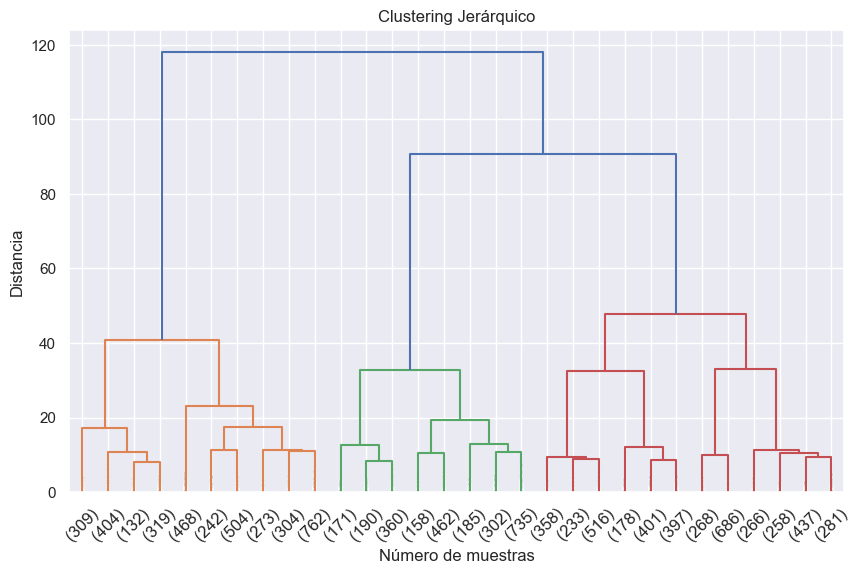

In [136]:
plt.figure(figsize=(10, 6)) 
dendrogram(Z, truncate_mode='lastp', p=30, leaf_font_size=12., show_contracted=True) 
plt.title('Clustering Jerárquico') 
plt.xlabel('Número de muestras') 
plt.ylabel('Distancia') 
plt.show() 

In [138]:
# Guardar etiquetas de clustering
customer_df['Cluster_KMeans'] = y_kmeans
customer_df['Cluster_DBSCAN'] = y_dbscan
from scipy.cluster.hierarchy import fcluster
customer_df['Cluster_Hierarchical'] = fcluster(Z, t=3, criterion='maxclust')


In [139]:
from sklearn.metrics import silhouette_score

# KMeans
silhouette_kmeans = silhouette_score(x, y_kmeans)
print(f"Silhouette Score - KMeans: {silhouette_kmeans:.3f}")
print(f"Inercia - KMeans: {kmeans.inertia_:.2f}")

# DBSCAN (ignora outliers)
mask_dbscan = y_dbscan != -1
silhouette_dbscan = silhouette_score(x[mask_dbscan], y_dbscan[mask_dbscan])
print(f"Silhouette Score - DBSCAN: {silhouette_dbscan:.3f}")

# Jerárquico
silhouette_hierarchical = silhouette_score(x, customer_df['Cluster_Hierarchical'])
print(f"Silhouette Score - Jerárquico: {silhouette_hierarchical:.3f}")


Silhouette Score - KMeans: 0.584
Inercia - KMeans: 7226.17
Silhouette Score - DBSCAN: 0.623
Silhouette Score - Jerárquico: 0.584


### Conclusiones:

- **KMeans**: Con un Silhouette Score de **0.584** y una inercia de **7226.17**, el modelo genera clusters razonablemente definidos, aunque se podrían explorar más valores de clusters para optimizar.
- **DBSCAN**: Con un Silhouette Score de **0.623**, ofrece los mejores resultados, detectando clusters bien diferenciados y gestionando los outliers de forma efectiva.
- **Jerárquico**: Similar a KMeans, con un Silhouette Score de **0.584**, proporciona buena segmentación y visualización a través del dendrograma.

En general, **DBSCAN** es el mejor método en términos de calidad de clustering, mientras que **KMeans** y **Jerárquico** también ofrecen segmentaciones válidas.
